# 0. 얼굴 임베딩 만들기

[(469, 440, 598, 311)]


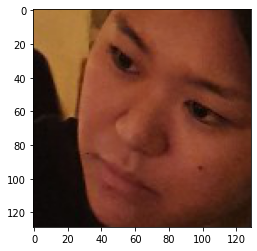

In [1]:
#얼굴 불러와주기
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/me2.jpeg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

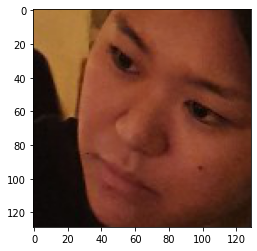

In [2]:
#이미지 파일 경로를 파라미터로 넘기면 얼굴 영역만 잘라서 뿌려주는 함수를 하나 만들어 두면 앞으로도 유용하게 사용할 수 있을 것 같습니다.

import face_recognition
import os

import face_recognition
import os

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

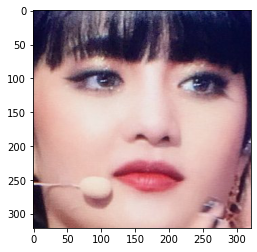

In [3]:
#위에서 생성한 face_crop 함수가 잘 동작하는지 확인해봅니다. 민니의 얼굴이 잘 잡히네요. 

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/민니.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

# 1. FaceNet
Face net은 네트워크 뒤에 l2 normarlization을 취하여 얻은 임베딩에 Triplet Loss를 사용한다고 합니다.    
Triplet Loss는 같은 사람의 얼굴은 가깝게, 다른 사람의 얼굴은 멀게 학습시키는 결과를 만들어냅니다 

 Face Recognition에는 FaceNet 얼굴 임베딩 모델이 탑재되어 있습니다. 
 이 모델을 이용하여 우리가 다운받은 연예인 이미지에서 얼굴 임베딩을 추출합니다.

In [4]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['조정치.jpg', '김대명.jpeg', '박보영.jpg', '노무현.jpeg', '화사.jpg', '김C.jpeg', '목진화.png', '리암 니슨.png', '이범수.jpeg', '카이.jpg', '지민(BTS).jpg', '조이.jpg', '택연.jpg', '크리스 에반스.jpg', '서장훈.jpg', '손호준.jpeg', 'me2.jpeg', '이정재.jpeg', '류준열.jpg', '태양.jpeg', '슈퍼비.jpeg', '황정민.jpg', '김현수.jpeg', '이영하.jpg', '손흥민.jpg', '이종석.jpeg', '정수빈.jpg', '티파니.jpg', '박서준.jpeg', '지코.jpg', '류승룡.jpeg', '윤균상.jpg', '박명수.jpg', '솔라.jpg', '조달환.png', '트와이스사나.jpg', '김경진.png', '성룡.jpg', '하현우.jpg', '배성우.png', '트와이스쯔위.jpg', '케빈 스페이시.jpeg', '로제.jpg', 'b1a4진영.jpeg', '미미.jpg', '제프리 힌턴.jpg', '서현진.jpg', '브래들리 쿠퍼.jpg', '시우민.jpg', '이말년.png', '장원영.jpeg', '다니엘 크레이그.jpeg', '박찬호.jpg', '이용진.jpg', '정형돈.jpg', '차명석.jpg', 'me.jpeg', '레인보우재경.jpg', '안재홍.jpg', '강민경.jpg', '박진영.jpg', '철면수심.jpg', '강동원.jpg', '산들.jpeg', '유노윤호.jpg', '백현.jpg', '전소미.jpg', '기성용.jpg', '박용택.jpg', 'bush.jpeg', '잭 니콜슨.jpeg', '박찬욱.jpeg', '스윙스.jpeg', '최준석.jpg', '지호.jpg', '케이.jpg', '장원준.jpeg', '고창석.jpeg', '차승원.jpg', '꽈두룹.jpeg', '김희철.jpg', '제이크 질렌할.jpeg', '박해일.jpeg', '잭 갤리퍼내키스.jpg', 

각 사진의 얼굴 임베딩 벡터를 구해 봅니다.    
get_gropped_face() 함수를 활용합니다.

In [5]:
image_file = os.path.join(dir_path, '민니.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.07090194,  0.01461232,  0.06486104, -0.10429835, -0.19257084,
        -0.11633791, -0.05157376, -0.05503146,  0.12688927, -0.12082519,
         0.06543542, -0.07812871, -0.19661579,  0.04595651, -0.01691224,
         0.16906458, -0.13458721, -0.19272538, -0.08066089,  0.00770114,
         0.04993569,  0.09262426, -0.03115353,  0.08067427, -0.08906605,
        -0.30864909, -0.09809241,  0.02137784, -0.07997718, -0.02671482,
         0.00166751,  0.13679978, -0.18716139, -0.04314631,  0.07367673,
         0.1035044 ,  0.02117414, -0.12580553,  0.10904575,  0.05783612,
        -0.30835068,  0.06738438,  0.08512718,  0.22025485,  0.1743935 ,
         0.0031043 ,  0.01084763, -0.1546195 ,  0.0973649 , -0.26609027,
         0.07973258,  0.14204112,  0.01147191,  0.04757981,  0.04995903,
        -0.14582811,  0.04922639,  0.12899013, -0.15467663, -0.0367827 ,
         0.11933197,  0.00721242,  0.00741716, -0.15029182,  0.22884481,
         0.10602742, -0.11990105, -0.17328119,  0.1

In [17]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [18]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['obama']

array([-0.08126269,  0.11014768, -0.01082436, -0.05268788,  0.01033718,
       -0.00813816, -0.07251763, -0.0922645 ,  0.19304708, -0.09246373,
        0.23908535,  0.06770279, -0.22123131, -0.14119366,  0.05562147,
        0.13705502, -0.17924425, -0.07232318, -0.11183269, -0.1137081 ,
        0.03956441, -0.01019115,  0.09421787,  0.04493123, -0.12757549,
       -0.34449592, -0.05374937, -0.17703311,  0.0086822 , -0.09721596,
       -0.0981718 ,  0.00278224, -0.17721362, -0.12789804,  0.03489832,
       -0.01991243, -0.00838929, -0.00132872,  0.18308586,  0.02447556,
       -0.12376561,  0.09957034,  0.02323559,  0.22983313,  0.28385225,
        0.06655719, -0.00558919, -0.0983354 ,  0.10058986, -0.23476943,
        0.060063  ,  0.13415909,  0.08373024,  0.03900502,  0.1019453 ,
       -0.19337651,  0.01717638,  0.08978971, -0.16005102,  0.01892098,
        0.03082444, -0.0605129 , -0.04526768,  0.04633341,  0.20678672,
        0.10299793, -0.12437527, -0.04905149,  0.12252696, -0.02

 # 2. 얼굴 임베딩 사이의 거리측정

사진 얼굴의 벡터값을 구하려고 하는데 index error가 계속 발생하네요. 슬랙에서 솔루션을 찾아봅니다.
```face_locations = face_recognition.face_locations(image) 을 통하여 얼굴인식에 실패할 경우 face_locations 이 빈 list로 정의됩니다. 이후  a, b, c, d = face_locations[0] 에서 존재하지 않는 원소에 접근하기 때문에 index error가 발생할 수 있습니다.```
라고 하시네요. 저는 except 함수를 활용할 자신이 없기 때문에 손수 얼굴인식에 실패한 사진들을 하나하나 지워줍니다.(^^)

```각 128차원의 벡터는 넘파이(Numpy)로 연산을 하기 위해서 리스트(list)에서 넘파이 배열(Numpy Array)로 변환해 줍니다. 그리고 각 벡터간의 거리를 numpy.linalg.norm를 활용하여 L2 Norm Distance로 계산합니다. L2 Norm Distance는 위의 식처럼 각 차원의 차이를 제곱한 뒤 합한 후 제곱근을 구한 값입니다. 2차원 유클리디안 거리를 다차원으로 확장시킨 것이라고 이해하시면 됩니다. 직접 계산해보겠습니다.```

거리 측정방식의 원리를 설명해주는데 하나도 모르겠네요. cs231n시간을 기대하며 우선 진행해보기로해요.

In [21]:
import numpy as np
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('민니', 'me2')

#민니와 저는 하나도 닮지 않았네요

0.6398564691091745

In [22]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1
sort_key_func = get_sort_key_func('trump')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.


In [23]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('trump',
  array([-0.15962461,  0.20268646,  0.0323635 ,  0.02439233, -0.06226433,
          0.0514071 ,  0.07351793, -0.16823342,  0.06962212, -0.05557969,
          0.17270111, -0.05094172, -0.35293111, -0.03164376,  0.03792981,
          0.1734385 , -0.13260117, -0.15357369, -0.23523541, -0.08442697,
         -0.00134133,  0.03210668, -0.08926147, -0.02670787, -0.09581173,
         -0.25792357, -0.01057008, -0.11071666,  0.03133569, -0.07444929,
          0.05670558, -0.02273803, -0.19461133, -0.04576058,  0.00947578,
          0.01806064, -0.15026242, -0.07787319,  0.17577602,  0.01933261,
         -0.19744579, -0.03930514,  0.07374467,  0.20196031,  0.14767544,
         -0.01415385,  0.01724756, -0.11976208,  0.09462965, -0.2431815 ,
         -0.02755117,  0.12169883,  0.148377  ,  0.17079775,  0.06952556,
         -0.15360464,  0.02005422,  0.08199161, -0.19544823,  0.10653654,
          0.11468483, -0.21902835, -0.07677593, -0.06791041,  0.10587607,
          0.05921577, -0.06

In [26]:
#임베딩 거리를 정렬해서 출력하는 함수를 구현해봅시다/
def get_nearest_face(name, top=10):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [27]:
get_nearest_face('me2')
#저랑 닮은 연예인 10명 정도를 찾아보았어요. 정말 하나도 안 닮았네요.

순위 1 : 이름(시우민), 거리(0.47214040350268466)
순위 2 : 이름(정국), 거리(0.48085383980581026)
순위 3 : 이름(리아), 거리(0.481748726250695)
순위 4 : 이름(슈퍼비), 거리(0.4826259074486237)
순위 5 : 이름(공효진), 거리(0.4979337093560687)
순위 6 : 이름(서현진), 거리(0.4979708171621463)
순위 7 : 이름(지수), 거리(0.4981108716179965)
순위 8 : 이름(꽈두룹), 거리(0.49917699798081405)
순위 9 : 이름(김고은), 거리(0.5009339173951775)
순위 10 : 이름(박보영), 거리(0.5015212445117672)


# 다양한 방식으로 표현하기

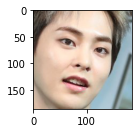

In [41]:
import numpy as np
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/me2.jpeg'
cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)
plt.subplot(2,1,2)
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/시우민.jpg'
cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

#서브플롯을 어떻게 활용하는지 모르겠어요....... 이렇게 하면 두개가 뜰 줄 알았는데 하나만 뜨네요 ㅠㅠ

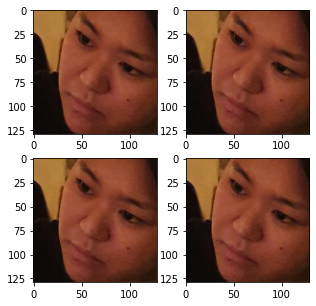

In [64]:
import numpy as np
import matplotlib.pyplot as plt

w=10
h=10
fig=plt.figure(figsize=(5, 5))
columns = 2
rows = 2
for i in range(1, columns*rows +1):
    #img = np.random.randint(10,size=(h,w))
    img = cropped_face = get_gropped_face(image_path)
    #cropped_face = get_gropped_face(image_path)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


#제 얼굴만 나오네요. 너무 웃긴데요. 크롭드 페이스를 다양하게 넣으려면 어떻게 해야할까요

In [67]:
a = os.getenv('HOME')+'/aiffel/face_embedding/images/시우민.jpg'
b = os.getenv('HOME')+'/aiffel/face_embedding/images/정국.jpg'
c = os.getenv('HOME')+'/aiffel/face_embedding/images/me2.jpeg'

TypeError: Image data of dtype <U54 cannot be converted to float

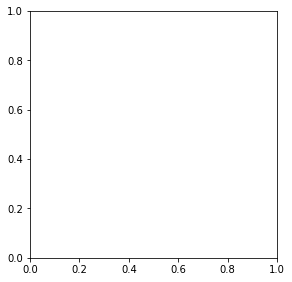

In [69]:
import numpy as np
import matplotlib.pyplot as plt

w=10
h=10
fig=plt.figure(figsize=(10, 10))
columns = 2
rows = 2
for i in range(1, columns*rows +1):
    #img = np.random.randint(10,size=(h,w))
    img = a
    cropped_face = get_gropped_face(a)
    #cropped_face = get_gropped_face(image_path)
    fig.add_subplot(rows, columns, i)
    plt.imshow(a)
plt.imshow()


#음... 모르겠어요! 일단 제출이 코앞이니까 제출하고 나중에 더 찾아볼래요. 

In [ ]:
im = imread('image_zoom_in.jpg');  % image_zoom_iun.jpg is your autumn.tif
im1 = im(1:206,1:206,:); 
im2 = imresize(im1,0.5);
im3 = imresize(im2,0.5);
ax1 = subplot(2,2,1);
imshow(im)
ax2 = subplot(2,2,2);
imshow(im1)
%setAllowAxesZoom(h,ax2,false);
ax3 = subplot(2,2,3);
imshow(im2)
%setAxesZoomMotion(h,ax3,'horizontal');
ax4 = subplot(2,2,4);
imshow(im3)
%setAxesZoomMotion(h,ax4,'vertical');

# 후기

모델을 구현하는 건 노드를 차근히 따라하면 문제가 없었는데 다양한 이미지로 구현하는 곳에서 현타가 왔다. 분명 matplotlib이나 seaborn이나 지난 노드에서 배웠는데 직접 사용해보려 어렵다. 너무 파이써닉하게 잘 짜진 코드들을 보다가 실제 내가 해보려니까 어려운 것 같다. 검색을 해서 솔루션들을 봤는데도 어떻게 적용해야하는지 모를때는 뭘 더 해야할까. 파이썬 공부를 더 열심히 하기로 다짐한다.
